## 读取交割单

In [15]:
import pandas as pd

df = pd.read_csv('交割单.csv')
print(df.head())

       成交日期    证券代码    证券名称 买卖标志    成交价格  成交数量     成交金额      发生金额    佣金  \
0  20190710  510500  500ETF   买入   5.235  6900  36121.5 -36128.72  7.22   
1  20190710  510500  500ETF   买入   5.236  4000  20944.0 -20949.00  5.00   
2  20190710     878    云南铜业   买入   9.900  2000  19800.0 -19805.00  5.00   
3  20190711     878    云南铜业   卖出  10.070 -1000  10070.0  10054.93  5.00   
4  20190711     878    云南铜业   卖出  10.160 -1000  10160.0  10144.84  5.00   

     印花税  过户费  其他费     成交编号        股东代码    备注    手续费  
0   0.00  0.0    0  4091881  A534878327  证券买入   7.22  
1   0.00  0.0    0  6083502  A534878327  证券买入   5.00  
2   0.00  0.0    0    99386   268955131  证券买入   5.00  
3  10.07  0.0    0    31351   268955131  证券卖出  15.07  
4  10.16  0.0    0    81106   268955131  证券卖出  15.16  


## 单个标的收益情况

In [16]:
dfEarn = df.groupby('证券名称')['发生金额'].sum().reset_index().sort_values('发生金额')

print(dfEarn)

     证券名称     发生金额
6    万达电影 -6694.69
50   安信信托 -6616.34
32  半导体50 -4430.55
7    世嘉科技 -3291.95
11   中国人寿 -3017.28
..    ...      ...
44   均胜电子  4418.44
81   美年健康  5297.35
59   拓普集团  6833.51
74   环旭电子  8190.13
18   中曼石油  9644.01

[99 rows x 2 columns]


## 单个标的收益分布

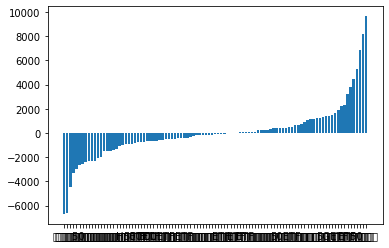

In [18]:
import matplotlib.pyplot as plt

plt.bar(dfEarn['证券名称'], dfEarn['发生金额'])

plt.show()

## 一些简单统计

In [47]:
import numpy as np

print('完成收益：', np.sum(dfEarn['发生金额']))

positive = list(filter(lambda x: x >= 0, dfEarn['发生金额']))

print('平均正收益：', np.mean(positive))

negative = list(filter(lambda x: x < 0, dfEarn['发生金额']))

print('平均负收益：', np.mean(negative))

print('操作标的数：', len(dfEarn))

print('成功率：', len(positive) / (len(dfEarn['发生金额'])))


完成收益： 1081.609999999946
平均正收益： 1633.4602380952372
平均负收益： -1184.6266666666672
操作标的数： 99
成功率： 0.42424242424242425


## 持仓时长和收益的关系

In [149]:
import datetime
from dateutil.parser import parse

buys = []
batches = []
for index, row in df.iterrows():
#     if row[2] != '均胜电子': continue
    buyed = list(filter(lambda x: x[2] == row[2], buys))
    if len(buyed) > 0:
        buyedOne = buyed[0]
        left = buyedOne[5] + row[5]
#         print(row[2], left)
        if left == 0:
            batches.append([buyedOne[2], (parse(str(row[0])) - parse(str(buyedOne[0]))).days, buyedOne[7] + row[7], buyedOne[15] + row[15]])
            buys = list(filter(lambda x: x[2] != row[2], buys))
        else:
            buyedOne[5] = left # 成交数量累积
            buyedOne[7] += row[7] # 发生金额累积
            buyedOne[15] += row[15] # 手续费累积
    else:
        buys.append(row)
        
#     print(buys);
#     print(batches);
#         if index == 20: break;
        
pdDuration = pd.DataFrame(batches).sort_values(1)
print(pdDuration)

pdDuration.to_csv('batches.csv')

         0   1        2        3
94    华宝油气   0   -21.74    21.74
0     云南铜业   1   394.77    35.23
114   天味食品   1   163.87    59.13
107   信隆健康   1  -695.59    28.59
106   浪潮信息   1   432.81    23.19
..     ...  ..      ...      ...
35    盛达资源  18  3778.70   196.30
71   证券ETF  19  1000.75    54.65
95    安信信托  23 -6616.34   136.34
90    长安汽车  28  4022.88    74.12
62    天齐锂业  51  -251.05  1012.05

[178 rows x 4 columns]


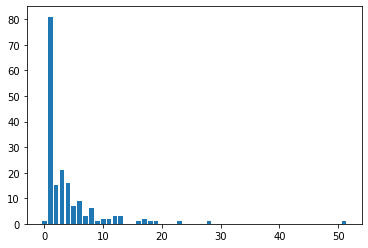

In [150]:
gpDuration = pdDuration.groupby(1)[2]

series = gpDuration.size().reset_index()

plt.bar(series[1], series[2])
plt.show()

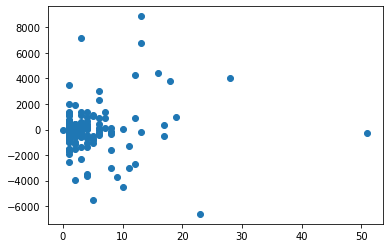

In [151]:
plt.scatter(pdDuration[1], pdDuration[2])
plt.show()